In [17]:
import pandas as pd
import requests
from dotenv import load_dotenv
import os

# Load the .env file
load_dotenv()

# Access the API key
API_KEY = os.getenv('GOOGLE_API_KEY')

# Load your dataset (assuming it's a CSV file with columns "COMPANY NAME" and "STATE")
df = pd.read_csv(r'C:\Users\daiyu\Documents\GitHub\2024colloquium_II\data\2011_public_company_bankruptcy_cases.csv')

# Function to get latitude and longitude for a company name and state
def get_location(company_name, state):
    # Combine company name and state for more accurate results
    search_query = f"{company_name}, {state}"
    
    # Google Places API URL with the combined query
    places_url = f"https://maps.googleapis.com/maps/api/place/findplacefromtext/json?input={search_query}&inputtype=textquery&fields=geometry&key={API_KEY}"
    
    response = requests.get(places_url)
    data = response.json()
    
    # Print the full API response for debugging
    print(f"Response for {search_query}: {data}")
    
    # Check if the API returned a valid response
    if data['status'] == 'OK' and data['candidates']:
        location = data['candidates'][0]['geometry']['location']
        return location['lat'], location['lng']
    else:
        return None, None

# Create new columns for latitude and longitude
df['Latitude'] = None
df['Longitude'] = None

# Iterate through the "COMPANY NAME" and "STATE" columns and get the location
for index, row in df.iterrows():
    company_name = row['COMPANY NAME']
    state = row['STATE']
    
    # Print the company name and state for debugging
    print(f"Processing: {company_name}, {state}")
    
    lat, lng = get_location(company_name, state)
    
    # Store the results in the DataFrame
    df.at[index, 'Latitude'] = lat
    df.at[index, 'Longitude'] = lng

# Save the updated DataFrame to a new CSV file
df.to_csv('1.csv', index=False)

print("Location data has been added to the data sheet and saved.")


ModuleNotFoundError: No module named 'dotenv'

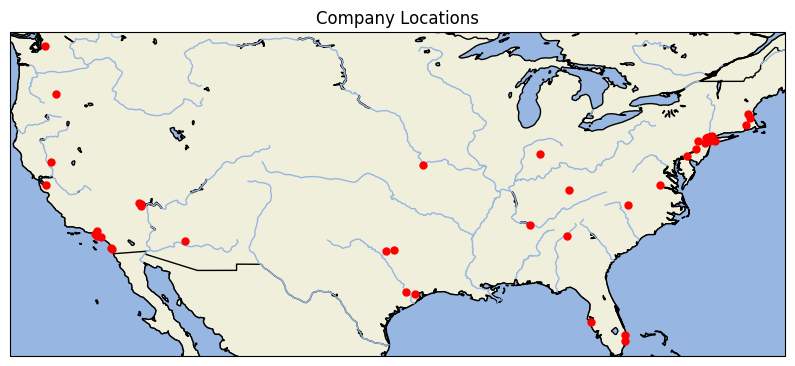

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Load your dataset (with 'Latitude' and 'Longitude' columns)
df = pd.read_csv('2011_updated_data_sheet.csv')

# Create a map with Cartopy
plt.figure(figsize=(10, 8))

# Use PlateCarree for a simple, global map projection
ax = plt.axes(projection=ccrs.PlateCarree())

# Add coastlines and other map features
ax.coastlines()
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAKES, edgecolor='black')
ax.add_feature(cfeature.RIVERS)

# Plot the company locations on the map
for index, row in df.iterrows():
    lat = row['Latitude']
    lng = row['Longitude']
    
    # Only plot if lat and lng are not empty
    if pd.notnull(lat) and pd.notnull(lng):
        plt.plot(lng, lat, marker='o', color='red', markersize=5, transform=ccrs.PlateCarree())

# Add a title
plt.title('Company Locations')

# Save the figure as an image (PNG or JPG)
plt.savefig('2011_company_locations_map.png', dpi=300)

# Show the plot
plt.show()


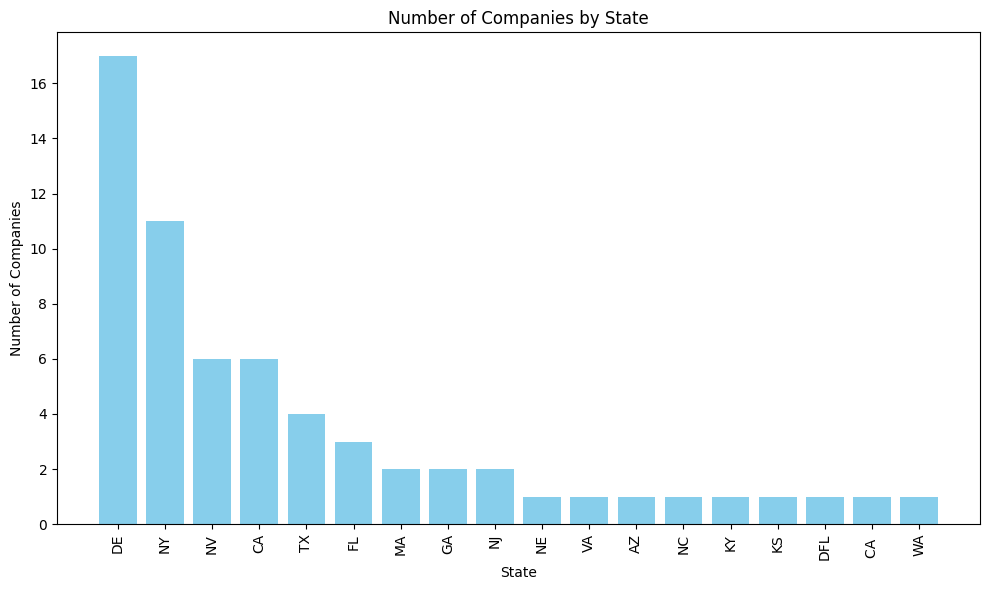

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset (assuming it has 'COMPANY NAME' and 'STATE' columns)
df = pd.read_csv('2011_updated_data_sheet.csv')

# Group by 'STATE' and count the number of companies per state
state_counts = df.groupby('STATE')['COMPANY NAME'].count().reset_index()

# Sort by the number of companies in descending order
state_counts = state_counts.sort_values(by='COMPANY NAME', ascending=False)

# Plotting the data
plt.figure(figsize=(10, 6))

# Create a bar chart
plt.bar(state_counts['STATE'], state_counts['COMPANY NAME'], color='skyblue')

# Add labels and title
plt.xlabel('State')
plt.ylabel('Number of Companies')
plt.title('Number of Companies by State')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# Display the plot
plt.tight_layout()
plt.show()


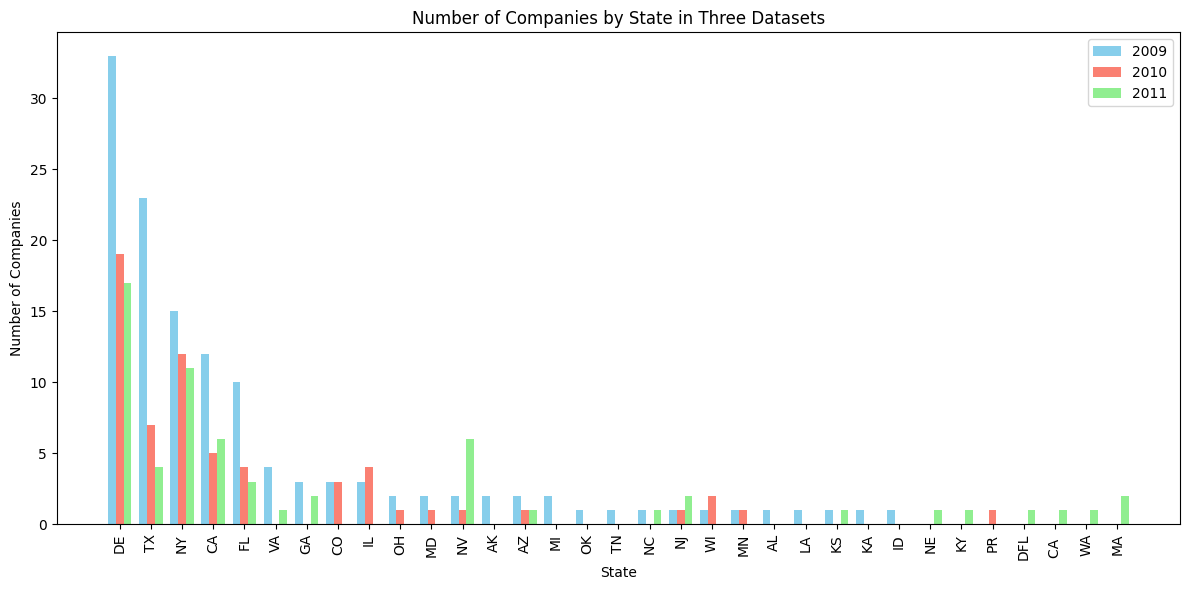

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load your datasets (assuming they have 'COMPANY NAME' and 'STATE' columns)
df1 = pd.read_csv('2009_updated_data_sheet.csv')
df2 = pd.read_csv('2010_updated_data_sheet.csv')
df3 = pd.read_csv('2011_updated_data_sheet.csv')

# Group by 'STATE' and count the number of companies per state for each dataset
state_counts1 = df1.groupby('STATE')['COMPANY NAME'].count().reset_index()
state_counts2 = df2.groupby('STATE')['COMPANY NAME'].count().reset_index()
state_counts3 = df3.groupby('STATE')['COMPANY NAME'].count().reset_index()

# Merge the data on 'STATE' to align the counts across datasets
merged_counts = pd.merge(state_counts1, state_counts2, on='STATE', how='outer', suffixes=('_dataset1', '_dataset2'))
merged_counts = pd.merge(merged_counts, state_counts3, on='STATE', how='outer')
merged_counts.rename(columns={'COMPANY NAME': 'COMPANIES_dataset3'}, inplace=True)

# Fill NaN values with 0 (in case some states don't exist in all datasets)
merged_counts.fillna(0, inplace=True)

# Sort by the first dataset's company counts (optional)
merged_counts = merged_counts.sort_values(by='COMPANY NAME_dataset1', ascending=False)

# Prepare data for plotting
states = merged_counts['STATE']
counts1 = merged_counts['COMPANY NAME_dataset1']
counts2 = merged_counts['COMPANY NAME_dataset2']
counts3 = merged_counts['COMPANIES_dataset3']

# Plotting the grouped bar chart
x = np.arange(len(states))  # label locations
width = 0.25  # width of the bars

fig, ax = plt.subplots(figsize=(12, 6))

# Plot bars for each dataset
ax.bar(x - width, counts1, width, label='2009', color='skyblue')
ax.bar(x, counts2, width, label='2010', color='salmon')
ax.bar(x + width, counts3, width, label='2011', color='lightgreen')

# Add labels and title
ax.set_xlabel('State')
ax.set_ylabel('Number of Companies')
ax.set_title('Number of Companies by State in Three Datasets')
ax.set_xticks(x)
ax.set_xticklabels(states, rotation=90)

# Add a legend
ax.legend()

# Adjust layout to prevent clipping
plt.tight_layout()

# Save the figure as an image (optional)
plt.savefig('companies_by_state_comparison.png', dpi=300)

# Show the plot
plt.show()
